In [22]:
import ROOT as rt

In [2]:
tree = rt.TChain("rechitntupler/hits", "Hits"); 
tree2 = rt.TChain("trackimpactntupler/impactPoints", "Tracks");

tree.AddFriend(tree2, "tracks");

In [5]:
#pattern = "scan3/ntuple_1*" ## Scan#3 from 1372 to 1440
#pattern = "scan2/ntuple_1*" ## Scan#2 1464 to 1537
#pattern = "scan3/ntuple_1*" ## Scan#2 1272 to 1339
pattern = "calo_scan/ntuple_1*" ## Scan after calo setup

#pattern = "scan3/ntuple_1*" ## Scan#3 from 1372 to 1440

tree.Add(pattern);
tree2.Add(pattern);

In [6]:
%%time
tree.GetEntries()

CPU times: user 578 ms, sys: 152 ms, total: 731 ms
Wall time: 1.1 s


1237014L

In [7]:
#rt.TProof.Open('workers=4').SetLogLevel(0)
#tree.SetProof()

In [8]:
tree.SetMarkerStyle(7)

In [20]:
tree.SetAlias("rechit_HG","rechit_energyHigh");
tree.SetAlias("rechit_LG","rechit_energyLow");

tree.SetAlias("rechit_id","rechit_channel + 64*rechit_skiroc");

## Invert rechit positions except for Chips 1 and 3
tree.SetAlias("rechit_corry","-rechit_y * (-1+2*(rechit_skiroc%2 == 1))");
tree.SetAlias("rechit_corrx","-rechit_x * (-1+2*(rechit_skiroc%2 == 1))");

tree.SetAlias("deltaX_tele","rechit_corrx + impactX_HGCal_layer_1");
tree.SetAlias("deltaY_tele","rechit_corry + impactY_HGCal_layer_1");

## Align impact position to board
tree.SetAlias("impactY","(PI_positionY-140 - impactY_HGCal_layer_1)/10. - 0.338");
tree.SetAlias("impactX","(PI_positionX-85  - impactX_HGCal_layer_1)/10. - 0.15");

#tree.SetAlias("deltaX","rechit_corrx - impactX");
#tree.SetAlias("deltaY","rechit_corry - impactY");
tree.SetAlias("deltaX","- rechit_x - impactX");
tree.SetAlias("deltaY","- rechit_y - impactY");


tree.SetAlias("deltaR","sqrt(deltaX*deltaX + deltaY * deltaY)");

tree.SetAlias("rechit_gainHLG","abs(rechit_energyHigh/rechit_energyLow - 10)");

In [10]:
cutstr = "PI_positionY > 0 ";
cutstr += "&& ntracks == 1 ";
#cutstr += "&& event < 100 ";
cutstr += "&& rechit_layer == 1 && rechit_energy > 0.5 && rechit_energy < 5 && rechit_gainHLG < 5"

# noisy channels
cutstr += "& !(rechit_skiroc == 0 && rechit_channel == 44)"

In [11]:
canv = rt.TCanvas("canv","c",1000,600);

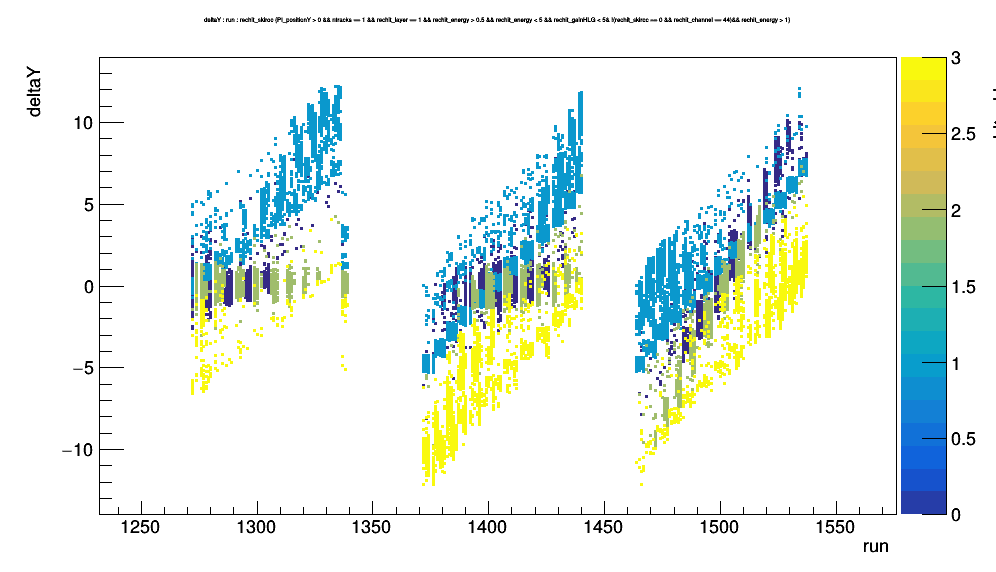

In [21]:
canv.cd()
cuts = cutstr + "&& rechit_energy > 1"
tree.Draw("deltaY : run : rechit_skiroc",cuts,"pcolz");
canv.Draw()

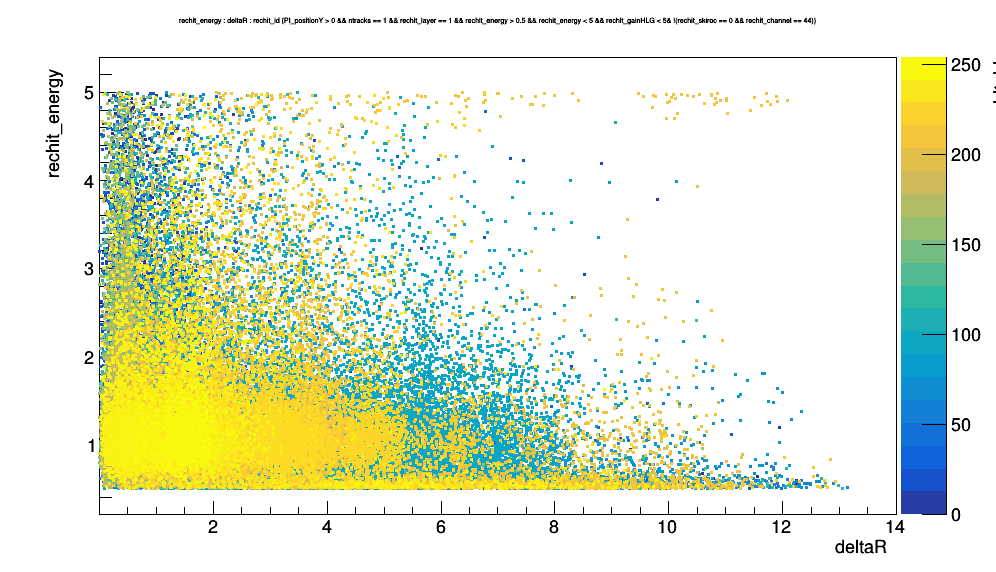

In [8]:
tree.Draw("rechit_energy : deltaR : rechit_id",cutstr,"pcolz");
canv.Draw()

In [9]:
canv_split = rt.TCanvas("canv_split","c",2000,1200);
canv_split.Divide(2,2);

In [10]:
canv_split.SetCanvasSize(2000,1200)

0
1
2
3


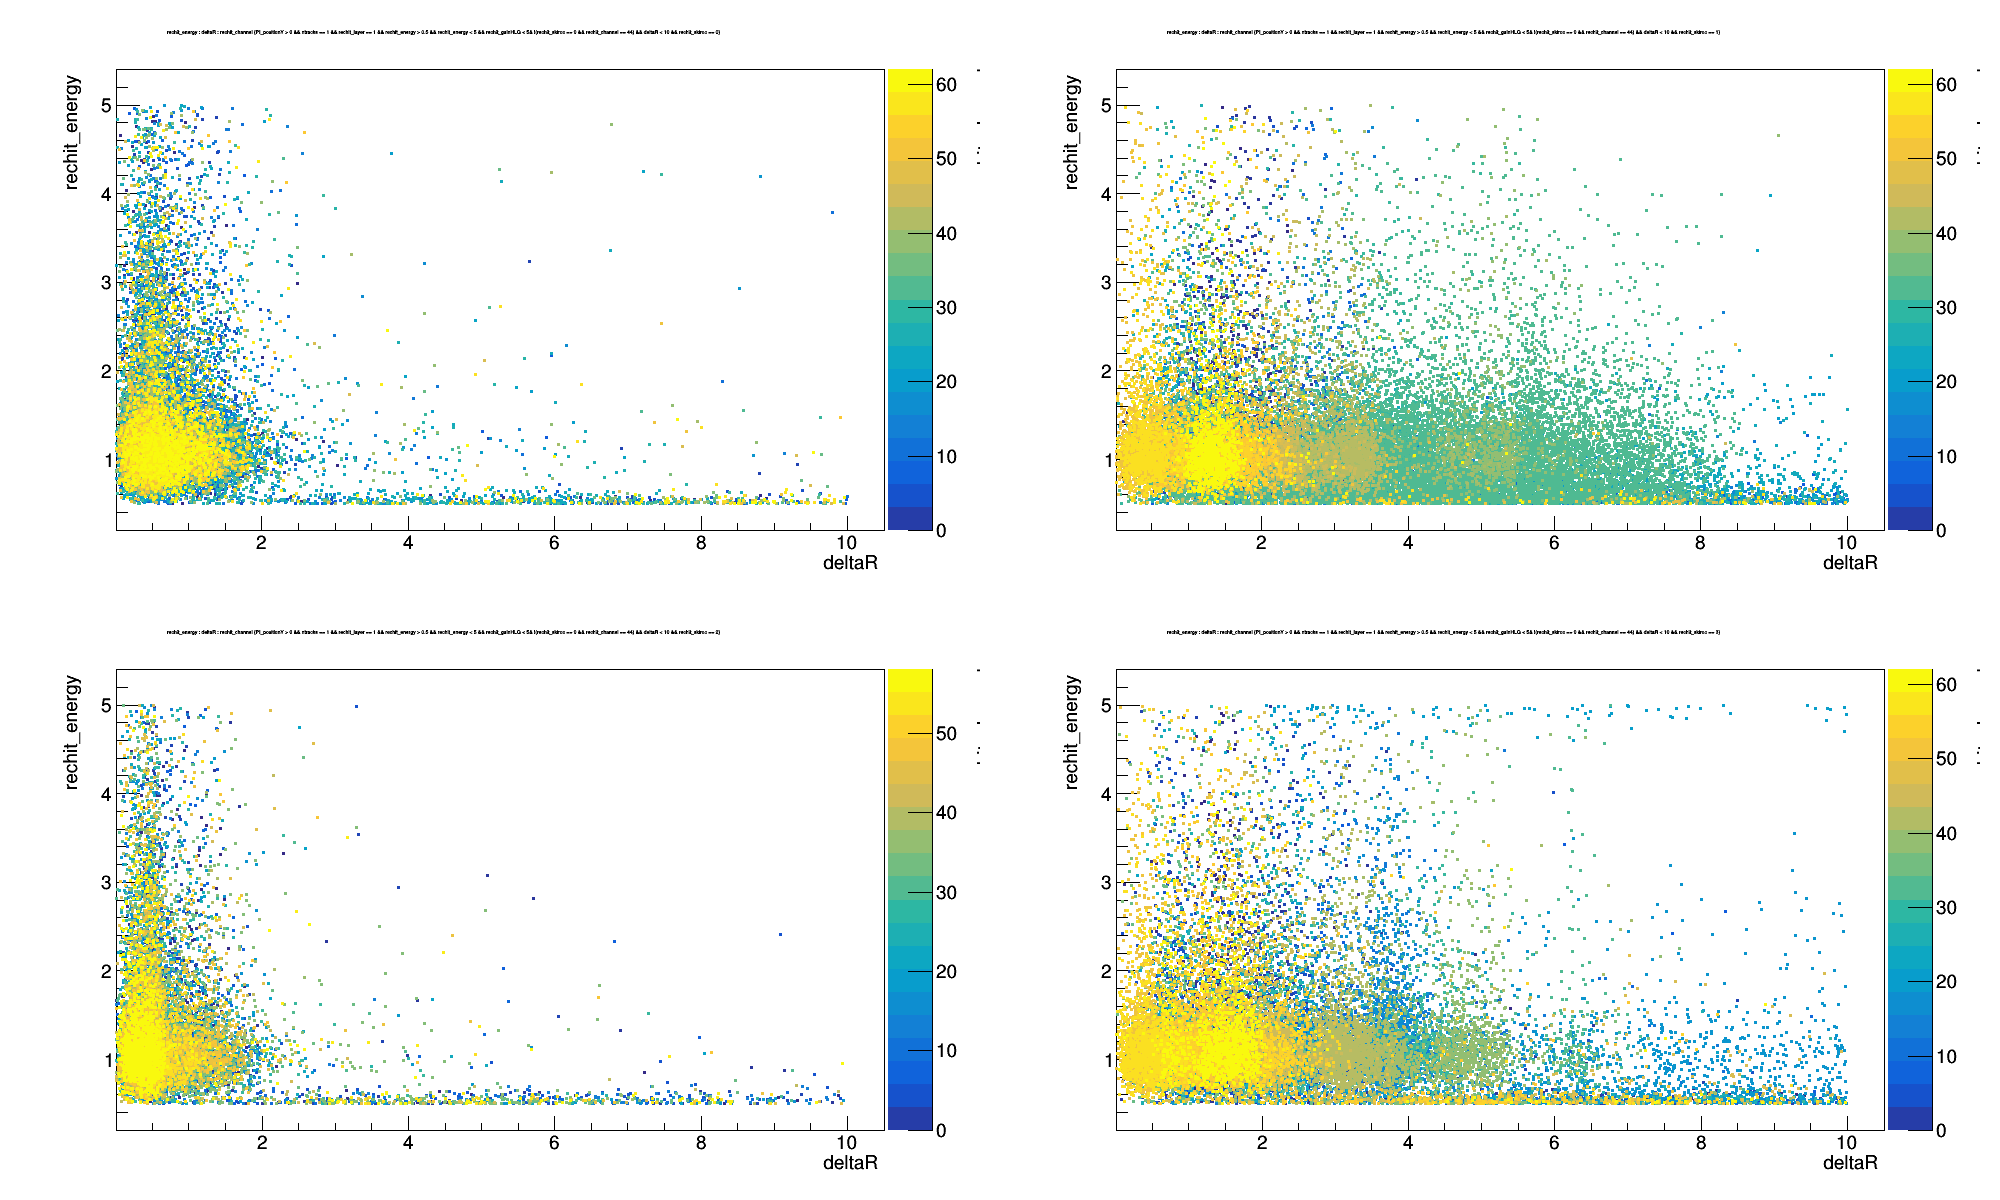

In [11]:
for chip in range(4):
    canv_split.cd(chip+1);
 
    cuts = cutstr + " && deltaR < 10 && rechit_skiroc == %i" %chip;
    print(chip)
    tree.Draw("rechit_energy : deltaR : rechit_channel",cuts,"pcolz");
    
canv_split.Draw()

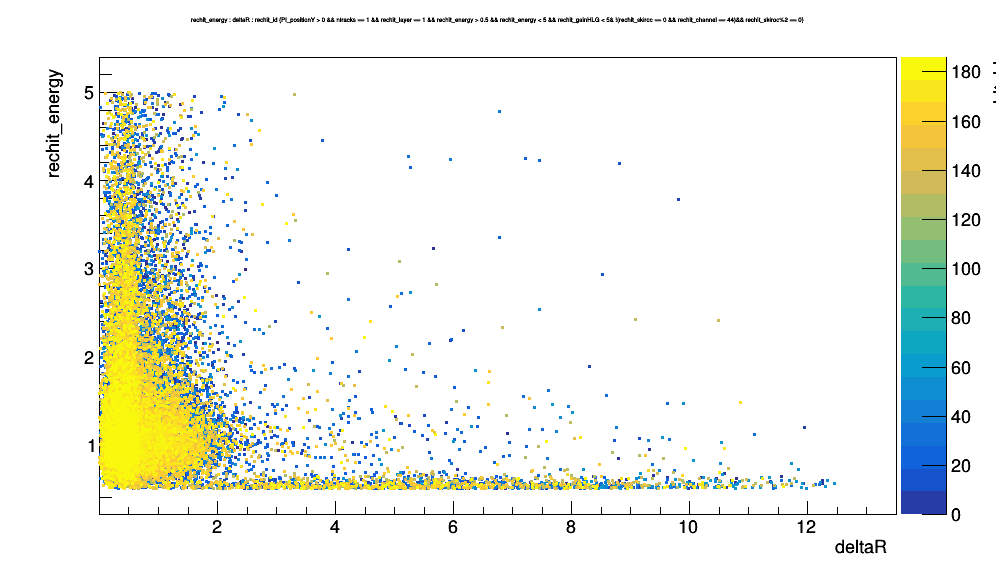

In [12]:
canv.cd()
cuts = cutstr + "&& rechit_skiroc%2 == 0"
tree.Draw("rechit_energy : deltaR : rechit_id",cuts,"pcolz");
canv.Draw()

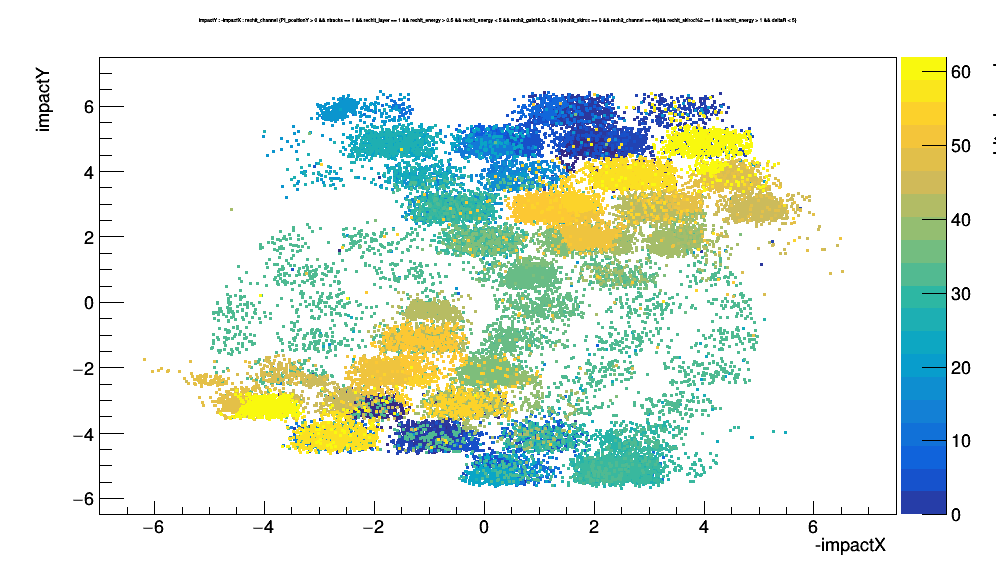

In [13]:
canv.cd()
cuts = cutstr + "&& rechit_skiroc%2 == 1 && rechit_energy > 1 && deltaR < 5"
tree.Draw("impactY : -impactX : rechit_channel",cuts,"pcolz");
canv.Draw()

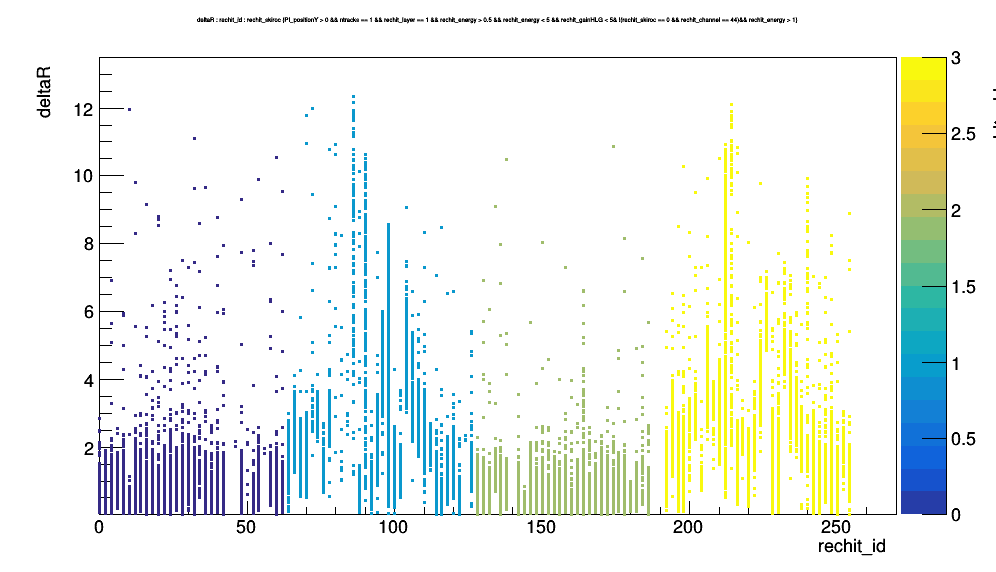

In [14]:
canv.cd()
cuts = cutstr + "&& rechit_energy > 1"
tree.Draw("deltaR : rechit_id : rechit_skiroc",cuts,"pcolz");
canv.Draw()

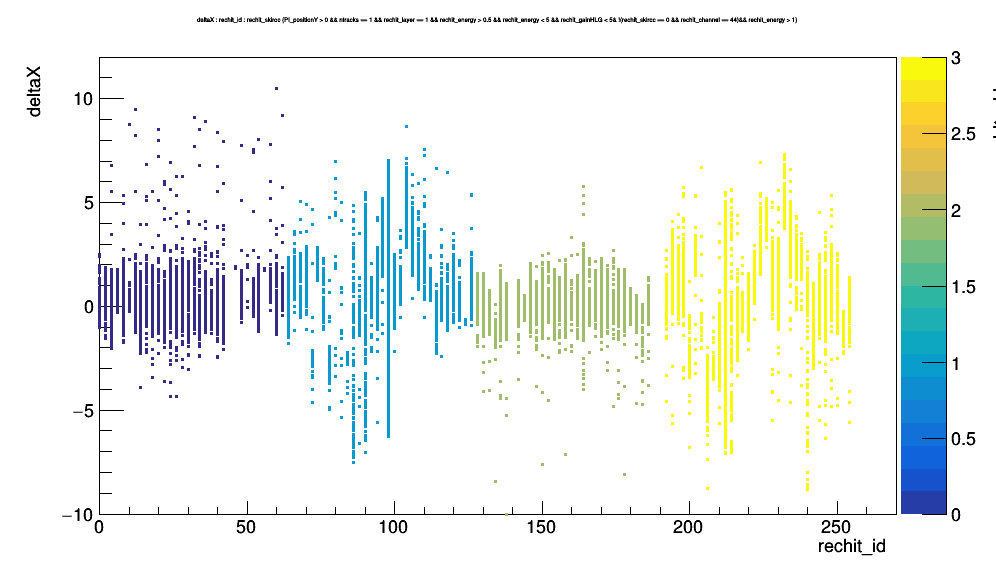

In [15]:
canv.cd()
cuts = cutstr + "&& rechit_energy > 1"
tree.Draw("deltaX : rechit_id : rechit_skiroc",cuts,"pcolz");
canv.Draw()

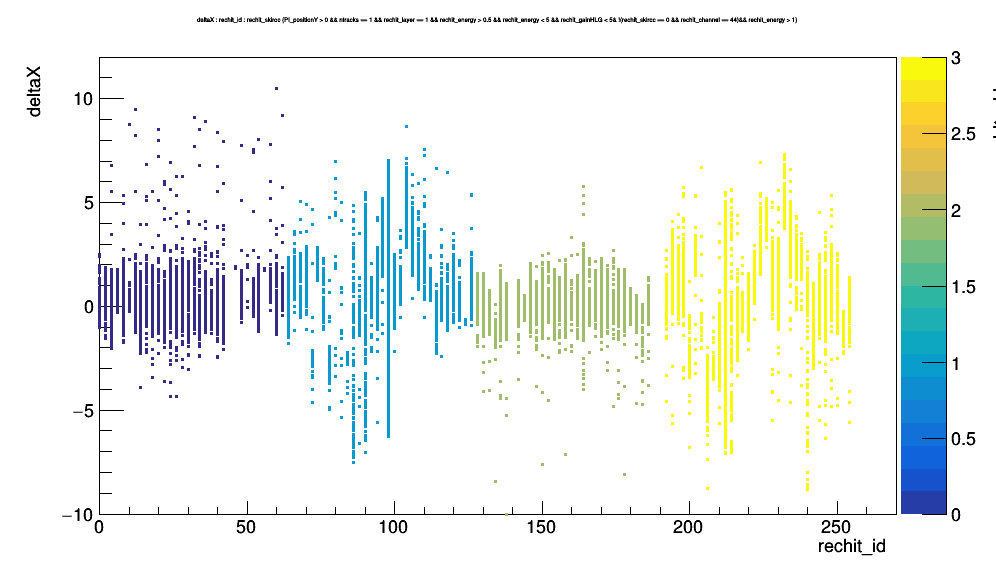

In [16]:
canv.cd()
cuts = cutstr + "&& rechit_energy > 1"
tree.Draw("deltaX : rechit_id : rechit_skiroc",cuts,"pcolz");
canv.Draw()

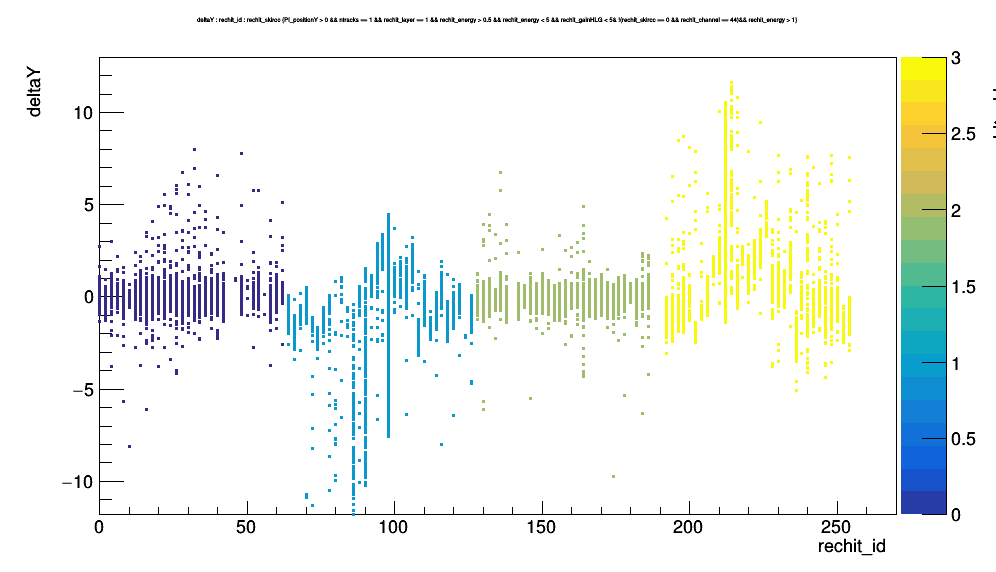

In [17]:
canv.cd()
cuts = cutstr + "&& rechit_energy > 1"
tree.Draw("deltaY : rechit_id : rechit_skiroc",cuts,"pcolz");
canv.Draw()

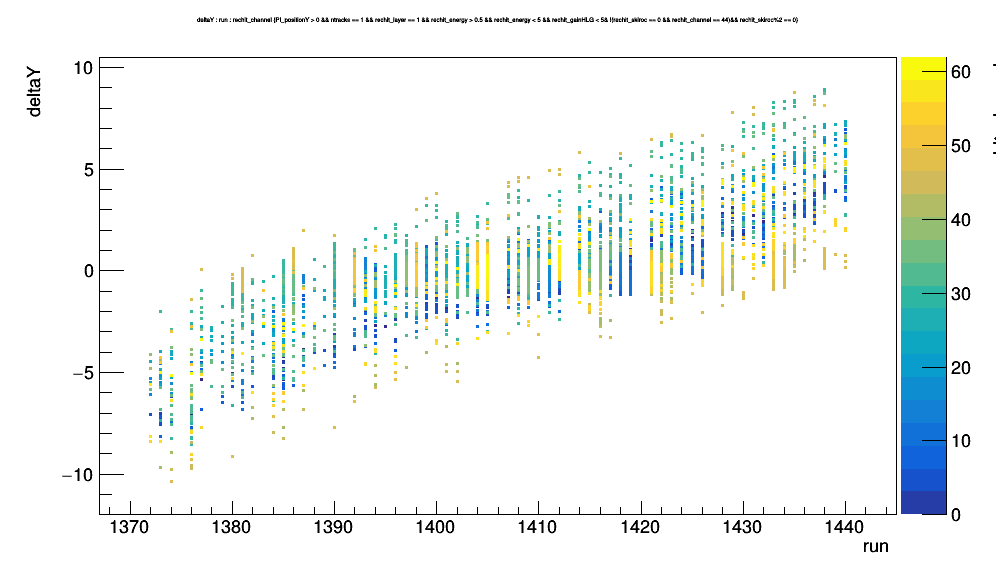

In [36]:
cuts = cutstr + "&& rechit_skiroc%2 == 0"
tree.Draw("deltaY : run : rechit_channel",cuts,"pcolz");
canv.Draw()

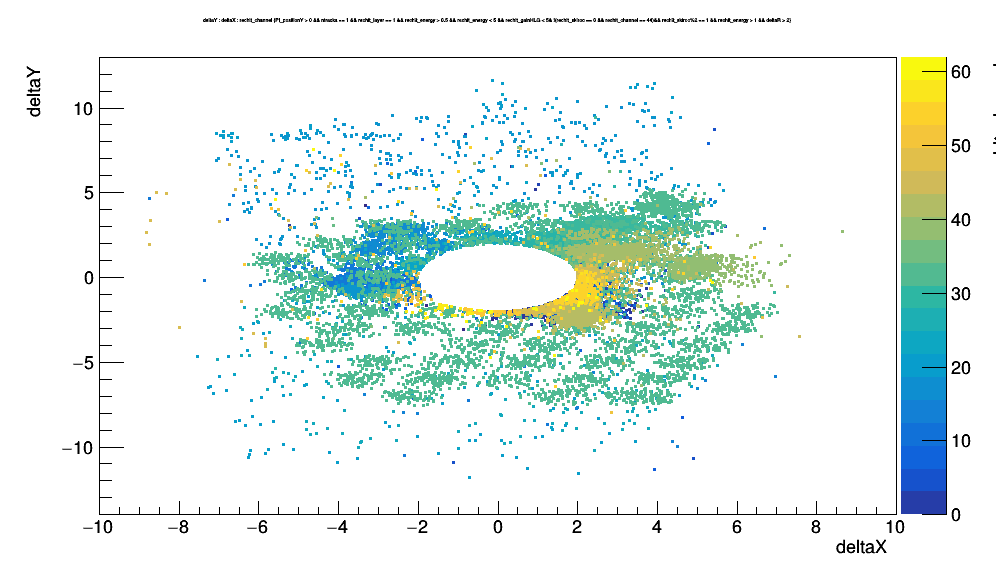

In [18]:
canv.cd()
cuts = cutstr + "&& rechit_skiroc%2 == 1 && rechit_energy > 1 && deltaR > 2"
tree.Draw("deltaY : deltaX : rechit_channel",cuts,"pcolz");
canv.Draw()

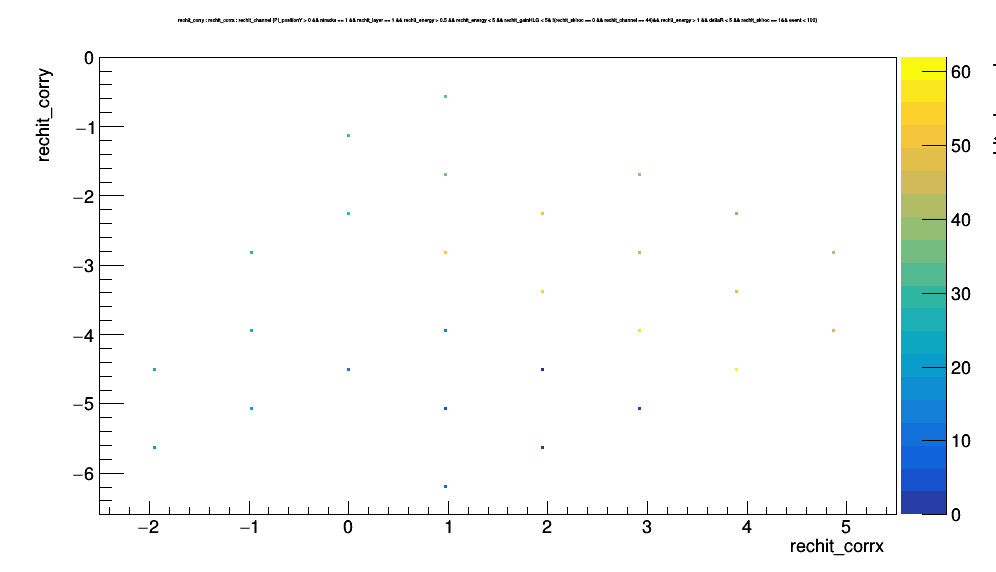

In [19]:
canv.cd()

chan = 10
chip = 1

cuts = cutstr + "&& rechit_energy > 1 && deltaR < 5 && rechit_skiroc == %i" %(chip)
cuts += "&& event < 100"

tree.Draw("rechit_corry : rechit_corrx : rechit_channel",cuts,"pcolz");
canv.Draw()

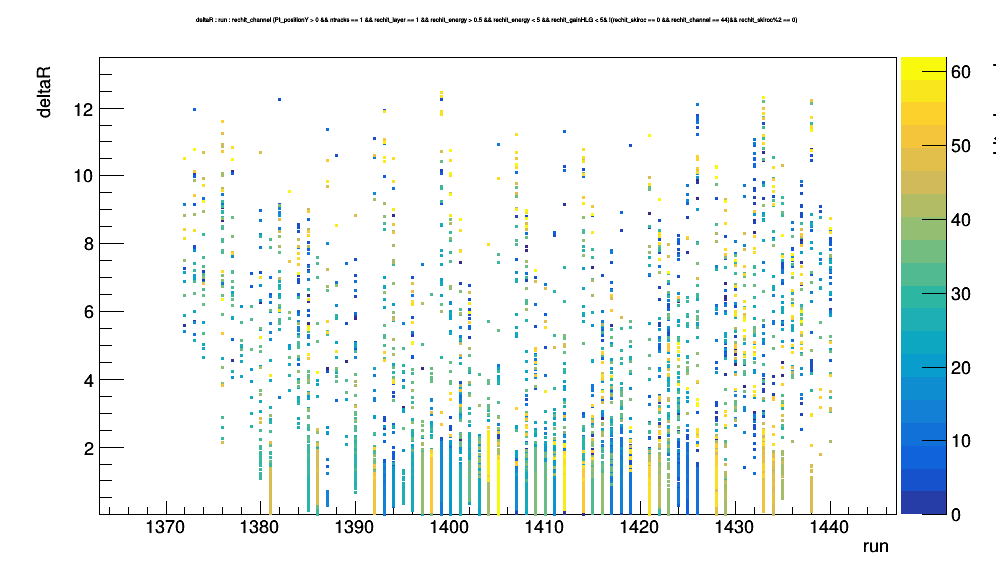

In [20]:
cuts = cutstr + "&& rechit_skiroc%2 == 0"
tree.Draw("deltaR : run : rechit_channel",cuts,"pcolz");
canv.Draw()

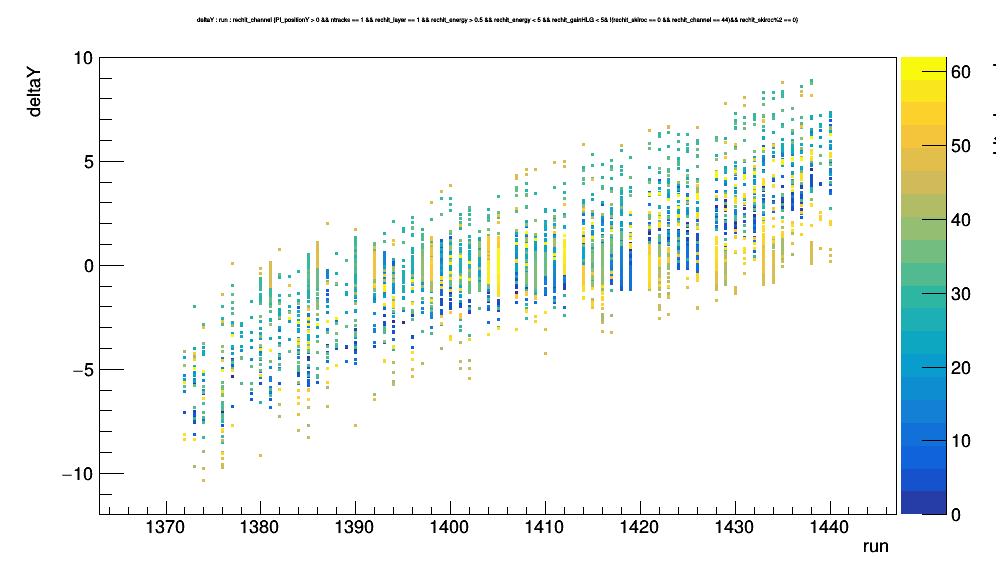

In [21]:
cuts = cutstr + "&& rechit_skiroc%2 == 0"
tree.Draw("deltaY : run : rechit_channel",cuts,"pcolz");
canv.Draw()

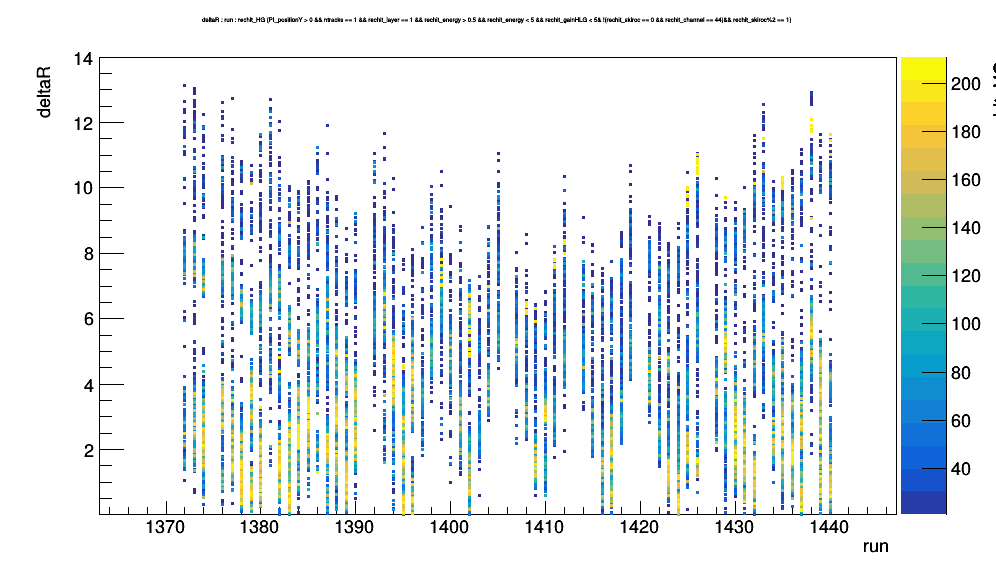

In [22]:
cuts = cutstr + "&& rechit_skiroc%2 == 1"
tree.Draw("deltaR : run : rechit_HG",cuts,"pcolz");
canv.Draw()

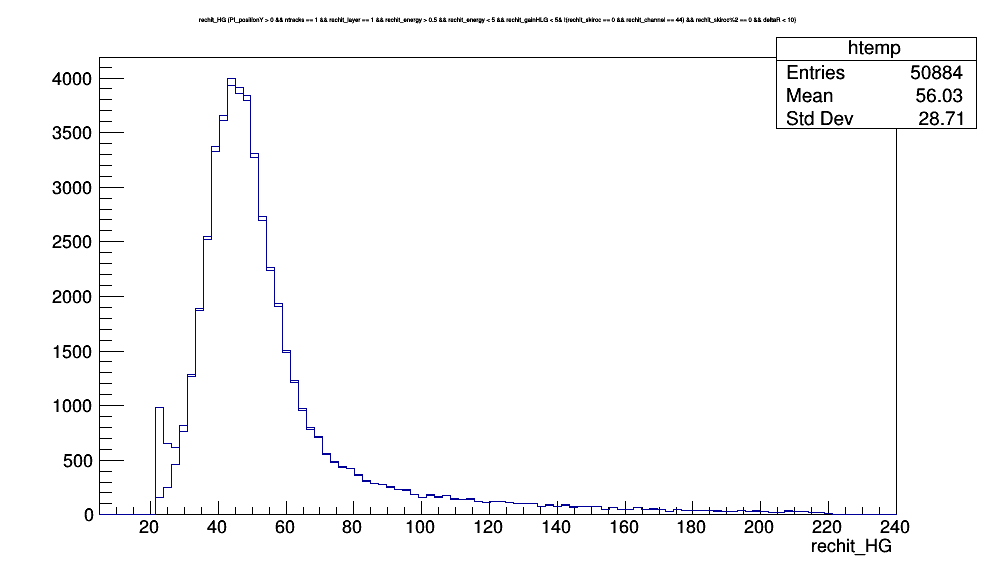

In [23]:
cuts = cutstr + " && rechit_skiroc%2 == 0 && deltaR < 10";
tree.Draw("rechit_HG",cuts,"");

cuts += " && deltaR < 2";
tree.Draw("rechit_HG",cuts,"same");

canv.Draw()

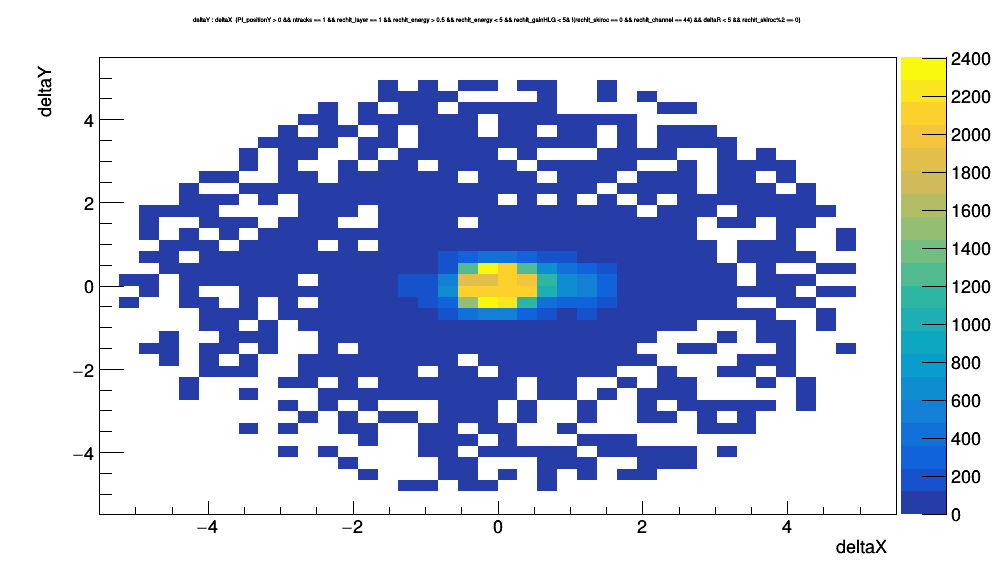

In [24]:
cuts = cutstr + " && deltaR < 5 && rechit_skiroc%2 == 0";
tree.Draw("deltaY : deltaX ",cuts,"colz");
canv.Draw()

 FCN=1255.93 FROM MIGRAD    STATUS=CONVERGED      61 CALLS          62 TOTAL
                     EDM=9.03758e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.48634e+03   8.35652e+00   1.17486e-01  -1.55585e-04
   2  Mean        -1.50411e-02   1.76597e-03   3.05594e-05  -1.29237e-02
   3  Sigma        3.86271e-01   1.26896e-03   1.51825e-05  -1.47188e+00


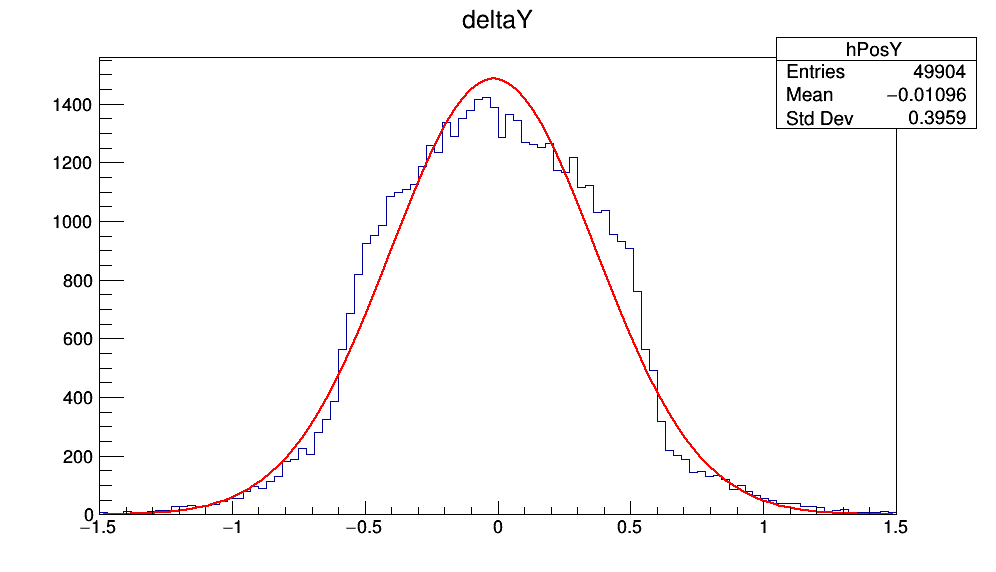

In [25]:
cuts = cutstr + " && deltaR < 5 && rechit_skiroc%2 == 0 ";

hPos = rt.TH1F("hPosY","deltaY", 100,-1.5,1.5);
tree.Draw("deltaY >> hPosY ",cuts,"");
hPos.Fit("gaus");

canv.Draw()

 FCN=3077.58 FROM MIGRAD    STATUS=CONVERGED      65 CALLS          66 TOTAL
                     EDM=4.47815e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.05832e+03   7.25206e+00   1.35439e-01  -6.89983e-06
   2  Mean         8.60272e-02   2.69073e-03   6.61968e-05  -3.17033e-02
   3  Sigma        5.08660e-01   2.61639e-03   2.94519e-05   2.48439e-02


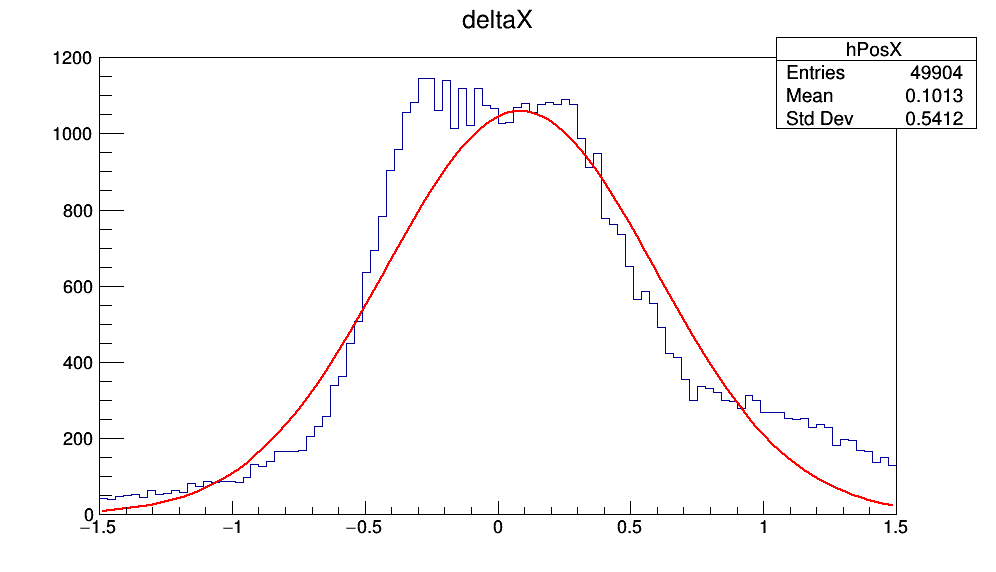

In [26]:
cuts = cutstr + " && deltaR < 5 && rechit_skiroc%2 == 0 ";

hPos = rt.TH1F("hPosX","deltaX", 100,-1.5,1.5);
tree.Draw("deltaX >> hPosX ",cuts,"");
hPos.Fit("gaus");

canv.Draw()

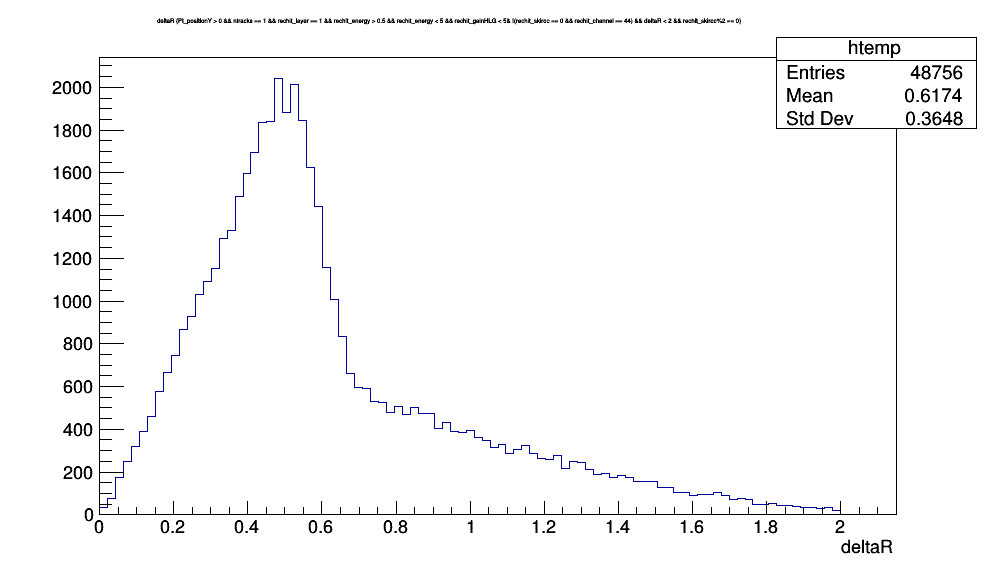

In [28]:
cuts = cutstr + " && deltaR < 2 && rechit_skiroc%2 == 0";
tree.Draw("deltaR",cuts,"");
canv.Draw()

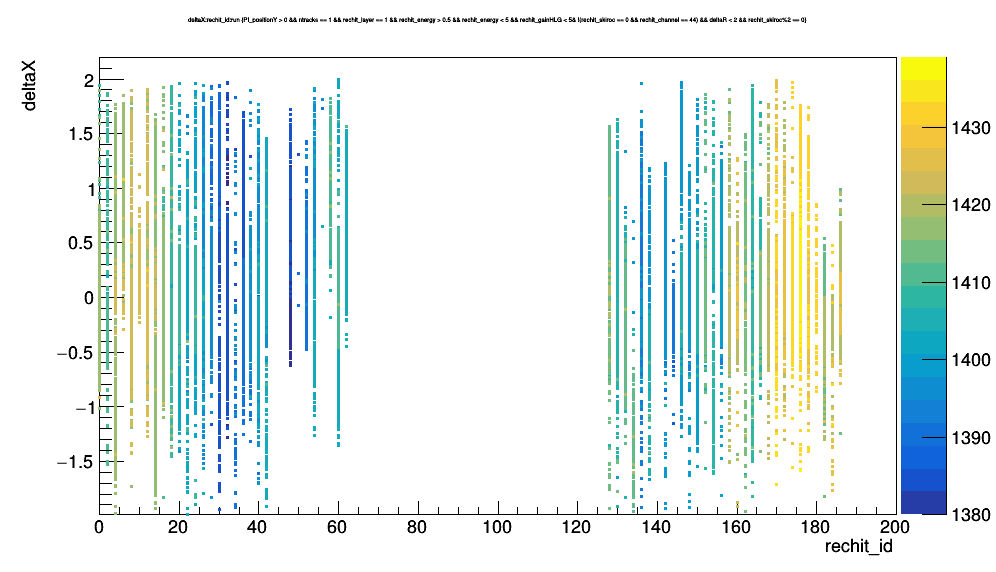

In [29]:
cuts = cutstr + " && deltaR < 2 && rechit_skiroc%2 == 0";
tree.Draw("deltaX:rechit_id:run",cuts,"pcolz");
canv.Draw()

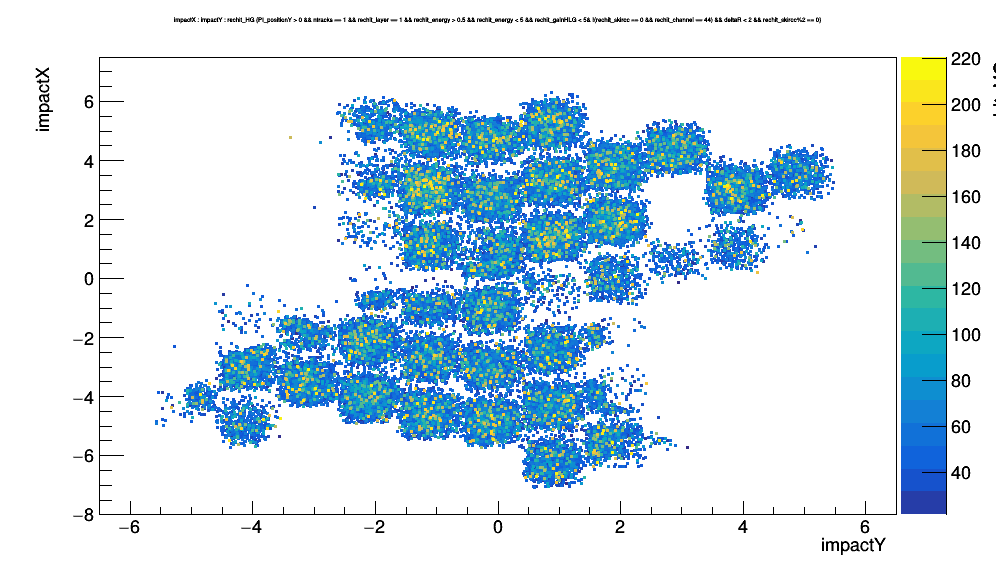

In [30]:
cuts = cutstr + " && deltaR < 2 && rechit_skiroc%2 == 0";
tree.Draw("impactX : impactY : rechit_HG",cuts,"pcolz");
canv.Draw()

## MIP / MPV

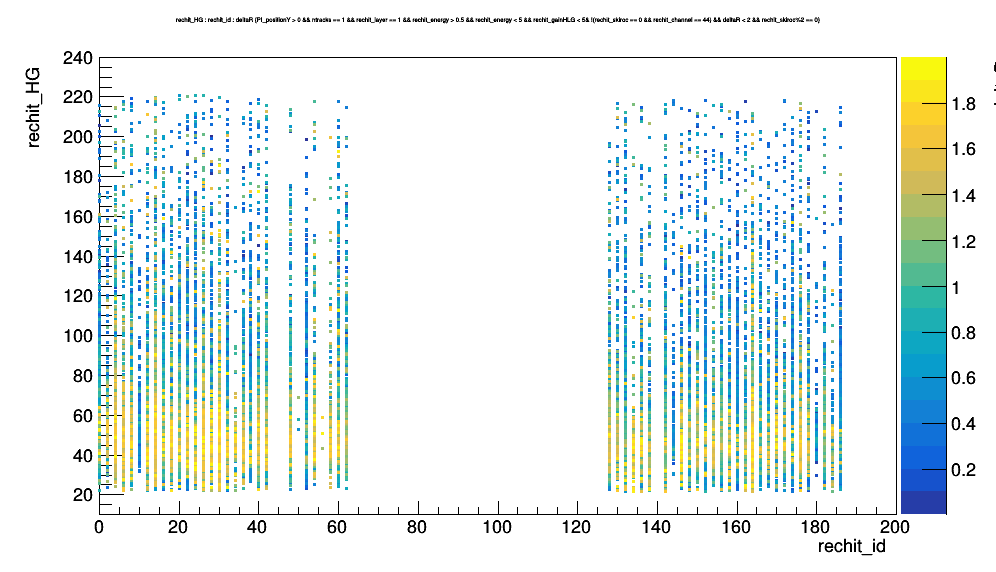

In [32]:
cuts = cutstr + " && deltaR < 2 && rechit_skiroc%2 == 0";
tree.Draw("rechit_HG : rechit_id : deltaR", cuts,"pcolz");
canv.Draw()

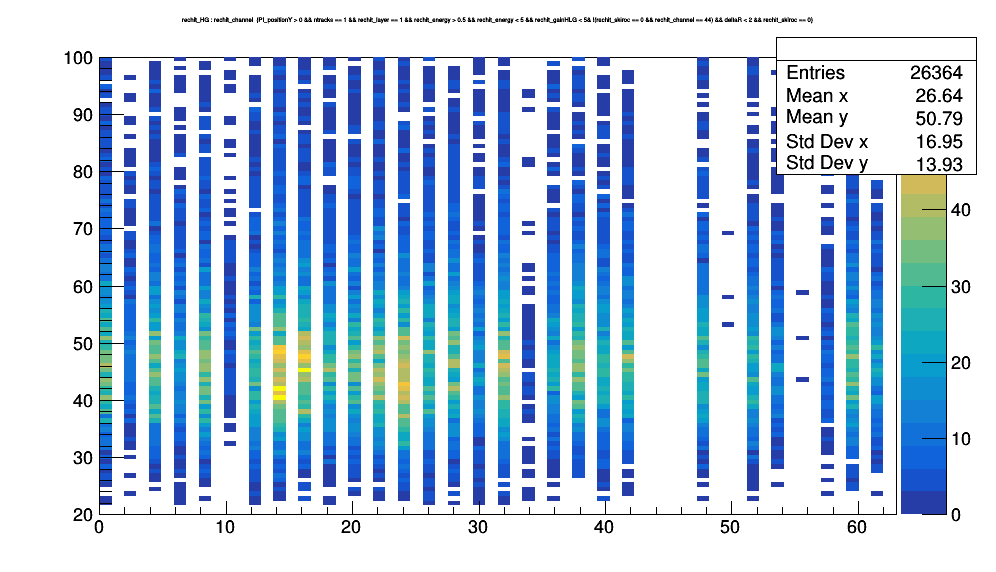

In [33]:
cuts = cutstr + " && deltaR < 2 && rechit_skiroc == 0";
tree.Draw("rechit_HG : rechit_channel >> (64,0,63,100,20,100)", cuts,"colz");
canv.Draw()

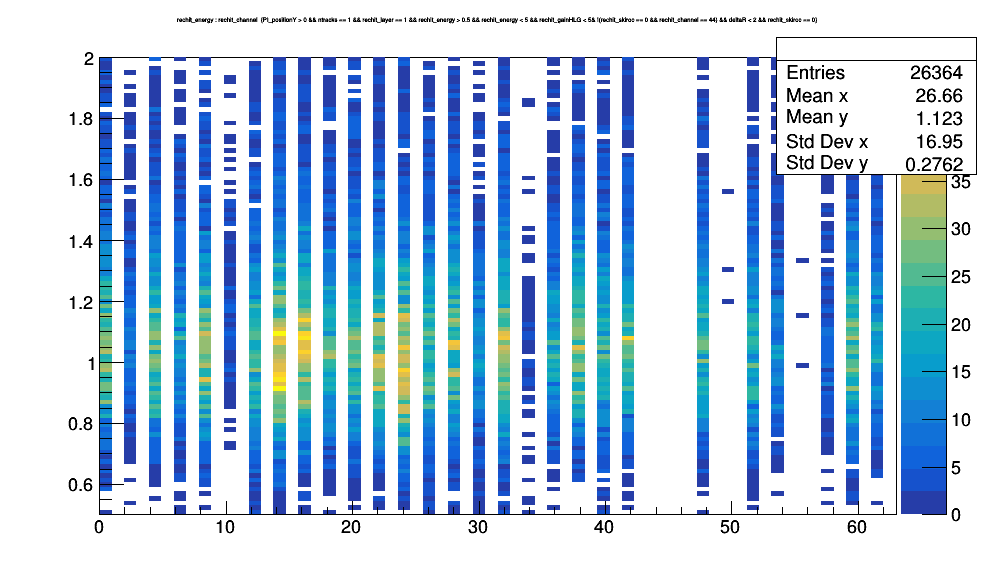

In [34]:
cuts = cutstr + " && deltaR < 2 && rechit_skiroc == 0";
tree.Draw("rechit_energy : rechit_channel >> (64,0,63,100,0.5,2)", cuts,"colz");
canv.Draw()